# Part 1: Simple Recommender System

## Section A: Introduction

▪ Recommender System refers to any system that recommends users objects (to purchase, to click on or to watch) which are attractive to them with a high probability.

▪ The ability to recommend relevant products or services to users can be a huge boost for a company.

▪ According to McKinsey, 75% of what people are watching on Netflix comes from recommendations.

▪ **(The reference of this practical)** https://www.datacamp.com/community/tutorials/recommender-systems-python

▪ **(Full dataset can be downloaded here)** https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv

### Simple Movies Recommender

▪ They offer generalized recommendations to every user, based on any attribute that indicates popularity.

▪ The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. 

## Section B: Data Exploration

▪ The "movies_metadata.csv" file contains information about ~45,000 movies. 

▪ Features include posters, backdrops, budget, genre, revenue, release dates, languages, production countries, and companies.

### Data vs. Metadata

<img src="metadata.png" width="400">

▪ Data is recorded facts. 

▪ Metadata is simply data about data, or a description and context of the data.

### Loading Dataset into Dataframe

https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [1]:
import pandas as pd

movies_data = pd.read_csv('movies_metadata.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_11416\2400473349.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_data = pd.read_csv('movies_metadata.csv')


In [2]:
movies_data = pd.read_csv('movies_metadata.csv', low_memory = False)

In [3]:
movies_data.shape

(45466, 24)

In [4]:
movies_data.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


### Retrieving All Columns' Names

In [5]:
movies_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### Identifying the Best Indicator of Popularity

▪ One possible option is the **movie ranking**, for instance, **top 250 movies based on their respective ratings such as vote_average**. 

▪ The **sort_values()** function sorts the DataFrame by the specified label.

▪ Syntax: **sort_values(by, axis, ascending, inplace, kind, na_position, ignore_index, key)**

In [9]:
movies_data.sort_values(by = ['vote_average'], ascending = False).head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
21642,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,320849,tt0886500,en,Ice Age Columbus: Who Were the First Americans?,Firmly rooted in the latest scientific discove...,...,2005-01-01,0.0,0.0,[],Released,NaN,Ice Age Columbus: Who Were the First Americans?,False,10.0,1.0
15710,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,96451,tt1587373,en,If God Is Willing and da Creek Don't Rise,"In 2006, director Spike Lee created an astonis...",...,2010-08-23,0.0,255.0,[],Released,NaN,If God Is Willing and da Creek Don't Rise,False,10.0,1.0
22396,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,72123,tt1341746,en,Meat the Truth,Meat the Truth is a high-profile documentary w...,...,2008-10-03,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Meat the Truth,False,10.0,1.0
22395,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.marvinhamlischmovie.com/,230864,tt3011874,en,Marvin Hamlisch: What He Did For Love,When Marvin Hamlisch passed away in August 201...,...,2013-10-12,0.0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Marvin Hamlisch: What He Did For Love,False,10.0,1.0
35343,False,NaN,300000,"[{'id': 35, 'name': 'Comedy'}, {'id': 99, 'nam...",NaN,140595,tt0308213,en,Elaine Stritch: At Liberty,Judy at the Palace. Sinatra at Carnegie Hall. ...,...,2002-01-01,0.0,140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Legendary performances come along so rarely.,Elaine Stritch: At Liberty,False,10.0,1.0


## Section C: Features Engineering

### Sorting a DataFrame by Multiple Columns

In [8]:
movies_data.sort_values(by = ['vote_average', 'vote_count'], ascending = [False, False]).head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
32440,False,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://ohmygomez.com/mariposa,324578,tt3919820,es,Mariposa,"A butterfly, a creature symbolising rebirth an...",...,2015-02-07,0.0,103.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,Do you believe in parallel universes?,Butterfly,False,10.0,3.0
34296,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,21466,tt0066070,hi,Mera Naam Joker,"Raju is a joker, a clown. It is what he is and...",...,1970-12-18,0.0,224.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Mera Naam Joker,False,10.0,3.0
35200,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,270926,tt3675486,uk,Майдан,A chronicle of the civil uprising against the ...,...,2014-05-21,0.0,130.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}, {'iso...",Released,NaN,Maidan,False,10.0,3.0
36633,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,237422,tt0103741,en,Avetik,Hovering between the realms of poetry and hist...,...,1992-04-04,0.0,80.0,"[{'iso_639_1': 'hy', 'name': ''}, {'iso_639_1'...",Released,NaN,Avetik,False,10.0,3.0
42614,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,390991,tt5566936,en,Frankie Boyle: Hurt Like You've Never Been Loved,Netflix Special,...,2016-03-18,0.0,64.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Frankie Boyle: Hurt Like You've Never Been Loved,False,10.0,3.0


### Focusing only on the Relevant Data

▪ Filter the dataframe down to the columns below:

\>>> original_title

\>>> vote_average

\>>> vote_count

In [10]:
df_movies = movies_data[['original_title', 'vote_average', 'vote_count']]
df_movies

,original_title,vote_average,vote_count
0,Toy Story,7.7,5415.0
1,Jumanji,6.9,2413.0
2,Grumpier Old Men,6.5,92.0
3,Waiting to Exhale,6.1,34.0
4,Father of the Bride Part II,5.7,173.0
...,...,...,...
45461,رگ خواب,4.0,1.0
45462,Siglo ng Pagluluwal,9.0,3.0
45463,Betrayal,3.8,6.0
45464,Satana likuyushchiy,0.0,0.0


### Issue with Simple Rating?

▪ Even the **vote_average** for a movie is very high, but it can be contributed by a single vote from one user only.

### Weighted Rating

▪ A weighted rating that takes into account the average rating and the number of votes it has accumulated.

▪ We can use the following weighted rating formula as a metric:

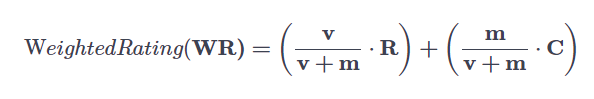

In the above equation,

\>>> **v** is the number of votes for the movie (represented by **vote_count**)

\>>> **m** is the **minimum of votes** required to be listed in the chart (to be calculated)

\>>> **R** is the average rating of the movie (represented by **vote_average**)

\>>> **C** is the **mean of average votes** across the whole report (to be calculated)

https://www.datacamp.com/tutorial/recommender-systems-python

### What is the Minimum Vote to be Considered?

▪ Suppose we want to use the 75th percentile as the number of minimum votes to be considered, then it means that for a movie to be featured in the charts, it must have more votes than at least 75% of the movies in the list (which is at least 34 votes).

### describe()

▪ Both the values of C and m can be viewed using describe().

▪ From the output, we can observe that the **average rating** of a movie is around 5.6 on a scale of 10, and the **75th percentile** is at least 34 votes.

https://www.datacamp.com/tutorial/recommender-systems-python

In [11]:
df_movies.describe()

,vote_average,vote_count
count,45460.000000,45460.000000
mean,5.618207,109.897338
std,1.924216,491.310374
min,0.000000,0.000000
25%,5.000000,3.000000
50%,6.000000,10.000000
75%,6.800000,34.000000
max,10.000000,14075.000000


### mean()

▪ To calculate the value of the **mean rating across all movies**, we use the pandas .mean() function.

In [12]:
# Calculate mean of vote average column
C = df_movies['vote_average'].mean()
C

5.618207215133889

### quantile()

▪ Suppose we want to consider the 90th percentile. 

▪ In other words, for a movie to be featured in the charts, it must have more votes than at least 90% of the movies on the list.

▪ To calculate the value of the 90th percentile, we use the pandas .quantile() function.

https://www.datacamp.com/tutorial/recommender-systems-python

In [13]:
# Calculate the minimum number of votes required to be in the chart, m
m = df_movies['vote_count'].quantile(0.90) 
m

160.0

### List of Movies in the 90th Percentile

In [14]:
# Extract all qualified movies into a new DataFrame
q_movies = df_movies.copy().loc[df_movies['vote_count'] >= m]
q_movies

,original_title,vote_average,vote_count
0,Toy Story,7.7,5415.0
1,Jumanji,6.9,2413.0
4,Father of the Bride Part II,5.7,173.0
5,Heat,7.7,1886.0
8,Sudden Death,5.5,174.0
...,...,...,...
45177,Brice 3,4.3,160.0
45204,Girls Trip,7.1,393.0
45258,Descendants 2,7.5,171.0
45265,Turist,6.8,255.0


In [15]:
len(q_movies)

4555

### Calculating the Weighted Rating Score (A New Feature)

▪ The formula of weighted rating is as follows:

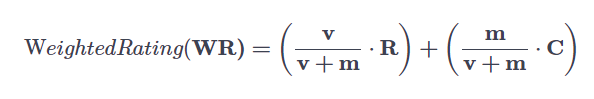

### apply()

▪ The apply() function is used to apply a function along an axis of the DataFrame.

▪ Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1).

\>>> 0 or 'index': apply function to each column.

\>>> 1 or 'columns': apply function to each row.

▪ It returns either a dataframe or a series, but it does not make changes to the original DataFrame object.

https://www.w3resource.com/pandas/dataframe/dataframe-apply.php

### Example

In [16]:
df = pd.DataFrame([[9, 25]] * 3, columns=['P', 'Q'])
df

,P,Q
0,9,25
1,9,25
2,9,25


In [17]:
import numpy as np

# The following code is the same as np.sqrt(df))
df.apply(np.sqrt)

,P,Q
0,3.0,5.0
1,3.0,5.0
2,3.0,5.0


<img src="exp1.png" width="400">

In [18]:
df.apply(np.sum, axis=0)

P    27
Q    75
dtype: int64

<img src="exp2.png" width="400">

In [19]:
df.apply(np.sum, axis=1)

0    34
1    34
2    34
dtype: int64

<img src="exp3.png" width="400">

In [20]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m = m, C = C):
    
    v = x['vote_count']
    R = x['vote_average']
    
    # Calculation based on the IMDB formula
    return (v / (v + m) * R) + (m / (m + v) * C)

In [23]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies['score'].head()

0    7.640253
1    6.820293
4    5.660700
5    7.537201
8    5.556626
Name: score, dtype: float64

In [24]:
q_movies.head()

,original_title,vote_average,vote_count,score
0,Toy Story,7.7,5415.0,7.640253
1,Jumanji,6.9,2413.0,6.820293
4,Father of the Bride Part II,5.7,173.0,5.660700
5,Heat,7.7,1886.0,7.537201
8,Sudden Death,5.5,174.0,5.556626


## Section D: Recommending Top 20 Popular Movies

▪ Sort the DataFrame in descending order based on the score feature column and output the title, vote count, vote average, and weighted rating (score) of the top 20 movies.

In [25]:
# Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending = False)

# Print the top 20 movies
q_movies.head(20)

,original_title,vote_average,vote_count,score
314,The Shawshank Redemption,8.5,8358.0,8.445869
834,The Godfather,8.5,6024.0,8.425439
10309,Dilwale Dulhania Le Jayenge,9.1,661.0,8.421453
12481,The Dark Knight,8.3,12269.0,8.265477
2843,Fight Club,8.3,9678.0,8.256385
292,Pulp Fiction,8.3,8670.0,8.251406
522,Schindler's List,8.3,4436.0,8.206639
23673,Whiplash,8.3,4376.0,8.205404
5481,千と千尋の神隠し,8.3,3968.0,8.196055
2211,La vita è bella,8.3,3643.0,8.187171


▪ This chart shows the top 20 popular movies with high rating. 

▪ Simple recommender is suitable for new users who did not have any interaction history in the system.

## Section E: Exercise

▪ Assuming that a movie could be very popular if its revenue is high, then create a simple recommender system that recommends the top 25 popular movies based on this feature.